# Proyek Analisis Data: Bike Sharing

### Nama: Maidatuz Zahraul Maulida
### Email: zahraulm52@gmail.comm
### ID Dicoding: aidazl_

## Menentukan Pertanyaan Bisnis

pertanyaan 1 : Bagaimana pengaruh suhu terhadap jumlah total peminjaman sepeda pada hari kerja dan hari libur?

pertanyaan 2 : Seberapa besar dampak kondisi cuaca (cerah, kabut, hujan ringan, dan hujan lebat) terhadap penurunan atau peningkatan jumlah peminjaman sepeda oleh pengguna kasual?

Pertanyaan 3 : Pada jam berapa pengguna terdaftar dan kasual masing-masing mencapai puncak peminjaman sepeda, dan bagaimana data ini dapat digunakan untuk mengoptimalkan ketersediaan sepeda di jam-jam tersebut??

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()
#menampilkan 5 kolom pertama tabel day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()
#menampilkan 5 kolom pertama dari tabel hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [9]:
day_df.info()
#memeriksa tipe data tiap kolom dalam tabel day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_df.isna().sum()
#cek missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
#melihat apakah ada duplikasi data

Jumlah duplikasi:  0


In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
hour_df.info()
#memeriksa tipe data  table hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()
#melihat apakah ada duplikasi data pada table hour

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [24]:
hour_df.isna().sum()
#cek missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [27]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
#mengubah tipe data kolom dteday pada tabel day

In [28]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [29]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
#mengubah tipe data kolom dteday pada tabel hour

In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [32]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [39]:
workingday_avg = hour_df[hour_df['workingday'] == 1].groupby('temp')['cnt'].mean().reset_index()
holiday_avg = hour_df[hour_df['holiday'] == 1].groupby('temp')['cnt'].mean().reset_index()
# Memisahkan data berdasarkan hari kerja dan hari libur

avg_usage = pd.merge(workingday_avg, holiday_avg, on='temp', suffixes=('_workingday', '_holiday'))
print(avg_usage)
# Menggabungkan hasil

    temp  cnt_workingday  cnt_holiday
0   0.10       66.034483    55.000000
1   0.12       67.627451     5.666667
2   0.14       64.978261    40.200000
3   0.16       74.653846    50.777778
4   0.18       64.650485    43.000000
5   0.20       88.536122    70.700000
6   0.22       80.296029    34.545455
7   0.24      101.480645    48.760000
8   0.26      103.729299   101.380952
9   0.28      116.375000    75.333333
10  0.30      127.119617    74.111111
11  0.32      141.682759    73.689655
12  0.34      143.940529    87.451613
13  0.36      156.692124   110.736842
14  0.38      167.773109   153.214286
15  0.40      172.361979   110.150000
16  0.42      185.167139   273.466667
17  0.44      163.303725   164.857143
18  0.46      162.697561   127.000000
19  0.48      182.138095   145.142857
20  0.50      201.486880   159.285714
21  0.52      197.147583   264.727273
22  0.54      191.409953   141.400000
23  0.56      194.662870   334.888889
24  0.58      228.431818   262.666667
25  0.60    

In [40]:
casual_avg_by_weathersit = hour_df.groupby('weathersit')['casual'].mean().reset_index()
print(casual_avg_by_weathersit)
#menghitung rata-rata peminjaman kasual berdasarkan kondisi cuaca

   weathersit     casual
0           1  40.545431
1           2  29.595290
2           3  16.055673
3           4   2.666667


In [42]:
hourly_usage = hour_df.groupby('hr')[['registered', 'casual']].sum().reset_index()
print(hourly_usage)

# Mencari jam dengan peminjaman tertinggi untuk pengguna terdaftar dan kasual
max_registered_hour = hourly_usage.loc[hourly_usage['registered'].idxmax()]
max_casual_hour = hourly_usage.loc[hourly_usage['casual'].idxmax()]

    hr  registered  casual
0    0       31755    7375
1    1       19455    4709
2    2       12940    3412
3    3        6281    1893
4    4        3554     874
5    5       13249    1012
6    6       52115    3017
7    7      146134    8037
8    8      245240   15761
9    9      136980   22458
10  10       92468   33789
11  11      108034   43286
12  12      134696   49718
13  13      132206   52713
14  14      120563   55089
15  15      128543   54606
16  16      173914   53834
17  17      282640   54220
18  18      265276   44496
19  19      191284   35505
20  20      138172   26378
21  21      104875   20570
22  22       79412   16200
23  23       52876   11065


## Visualization & Explanatory Analysis

Pertanyaan 1:

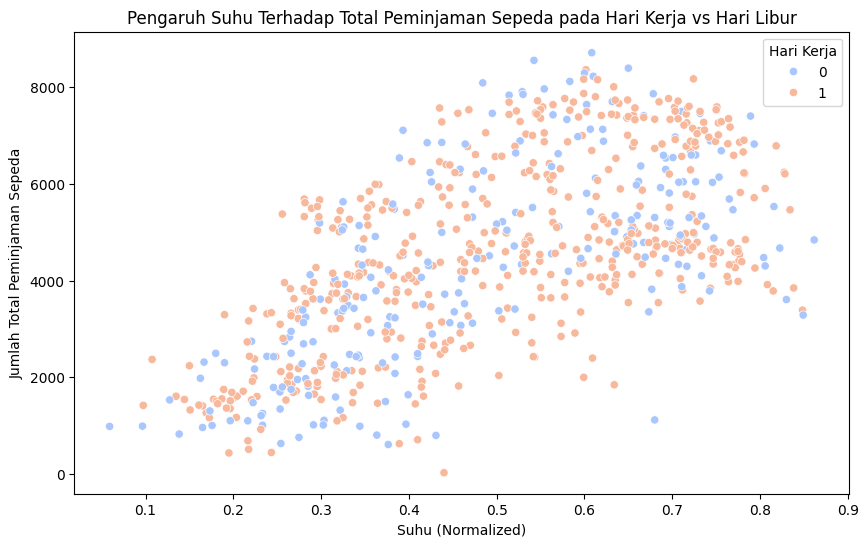

In [90]:
# Create scatter plot to visualize temperature vs total rentals (cnt)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='workingday', palette='coolwarm')
plt.title('Pengaruh Suhu Terhadap Total Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Total Peminjaman Sepeda')
plt.legend(title='Hari Kerja')
plt.show()

Pertanyaan 2:

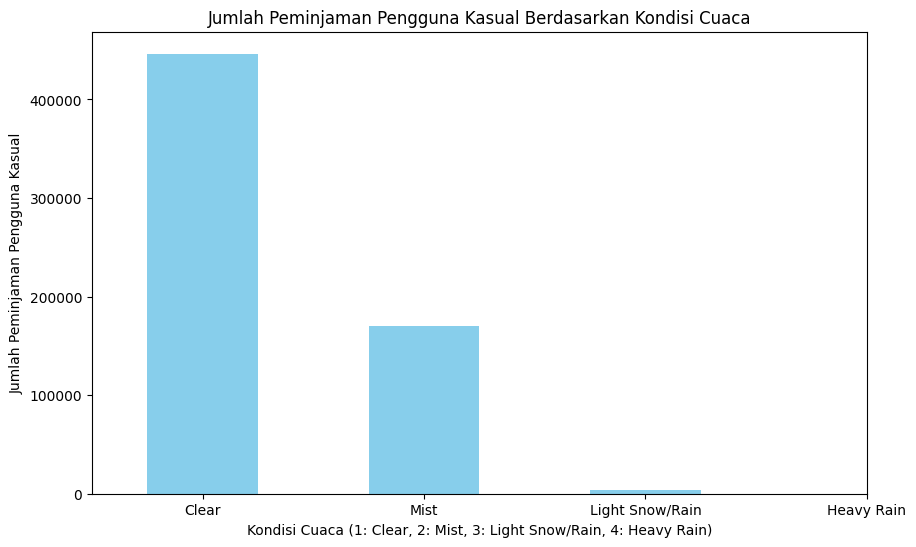

In [11]:
# Group by weather condition and sum up the number of casual rentals
weather_casual = day_df.groupby('weathersit')['casual'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
weather_casual.plot(kind='bar', color='skyblue')
plt.title('Jumlah Peminjaman Pengguna Kasual Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain)')
plt.ylabel('Jumlah Peminjaman Pengguna Kasual')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'], rotation=0)
plt.show()

Pertanyaan 3:

<Figure size 1000x600 with 0 Axes>

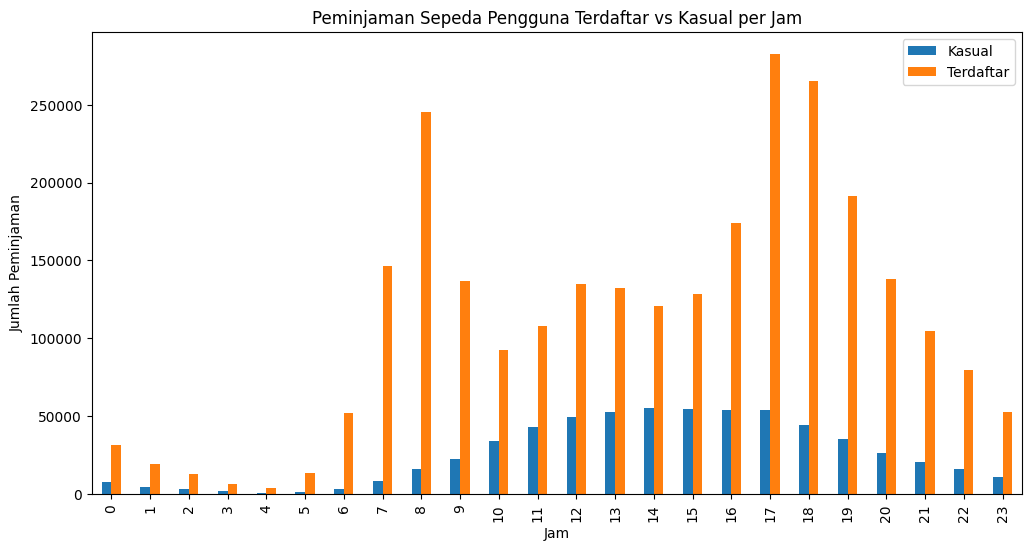

In [13]:
# Group by hour and sum up the counts
hourly_counts = hour_df.groupby('hr').sum()

# Create a bar plot for comparison between registered and casual users
plt.figure(figsize=(10, 6))
hourly_counts[['casual', 'registered']].plot(kind='bar', figsize=(12,6))
plt.title('Peminjaman Sepeda Pengguna Terdaftar vs Kasual per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend(['Kasual', 'Terdaftar'])
plt.show()

## Conclusion

Conclution pertanyaan 1 :
suhu berpengaruh positif terhadap jumlah peminjaman sepeda baik pada hari kerja maupun hari libur. Semakin tinggi suhu, jumlah peminjaman cenderung meningkat. Namun, peminjaman pada hari kerja lebih tinggi dibandingkan hari libur terutama pada suhu yang lebih tinggi, yang mungkin terkait dengan aktivitas rutin seperti bekerja. Meskipun demikian, terdapat variasi yang cukup besar dalam jumlah peminjaman di kedua jenis hari, yang menunjukkan bahwa selain suhu, ada faktor lain yang turut mempengaruhi jumlah peminjaman.


Conclution pertanyaan 2 : terdapat hubungan yang jelas antara kondisi cuaca dan jumlah peminjaman sepeda oleh pengguna kasual. Peminjaman sepeda paling banyak terjadi saat cuaca cerah (Clear), dengan penurunan signifikan saat cuaca berkabut (Mist) dan hampir tidak ada peminjaman ketika cuaca bersalju ringan/hujan ringan (Light Snow/Rain) maupun hujan deras (Heavy Rain). Hal ini menunjukkan bahwa kondisi cuaca yang buruk berdampak negatif pada jumlah peminjaman sepeda oleh pengguna kasual.

Conclution pertanyaan 3 : peminjaman sepeda pengguna terdaftar mencapai puncaknya pada pukul 8 pagi dan 5-6 sore, yang menunjukkan aktivitas tinggi di jam sibuk, kemungkinan terkait perjalanan kerja. Sebaliknya, pengguna kasual cenderung lebih banyak meminjam sepeda pada siang hingga sore hari, terutama antara pukul 10 pagi hingga 4 sore, dengan intensitas yang lebih rendah dibanding pengguna terdaftar.